# MIMIC
/DATA1/llm-research/MIMIC-CXR   
227,835 radiology studies

# RadGraph
/DATA1/llm-research/RadGraph/physionet.org/files/radgraph/1.0.0/

train,json  
425  
{'MIMIC-CXR'}  
not 500?

test.json  
100
{'MIMIC-CXR', 'CheXpert'}

Paper RadGraph
> We release a development dataset, which contains board-certified radiologist annotations for 500 radiology reports from the MIMIC-CXR dataset (14,579 entities and 10,889 relations), and a test dataset, which contains two independent sets of board-certified radiologist annotations for 100 radiology reports split equally across the MIMIC-CXR and CheXpert datasets.



In [4]:
import json
import pprint

graph_train_path = '/DATA1/llm-research/RadGraph/physionet.org/files/radgraph/1.0.0/train.json'

with open(graph_train_path, 'r') as f:
    train_data = json.load(f)

# pprint.pprint(train_data)

print(train_data['p18/p18004941/s58821758.txt'])

entities = train_data['p18/p18004941/s58821758.txt']['entities']



# Step 1: Initialize an empty list for tokens
all_tokens = []

# Step 2: Iterate through each document in train_data
for document_key in train_data:
    # Access the 'entities' for the current document
    entities = train_data[document_key]['entities']
    
    # Step 4: Iterate through each entity in 'entities'
    for entity_key in entities:
        # Step 5: Access the 'tokens' field and append its value to the all_tokens list
        all_tokens.append(entities[entity_key]['tokens'])

# At this point, all_tokens list contains all tokens from the entire train_data
print(len(all_tokens))
# print(all_tokens)

# Step 1: Initialize an empty set for tokens
all_tokens = set()

# Step 2: Iterate through each document in train_data
for document_key in train_data:
    # Access the 'entities' for the current document
    entities = train_data[document_key]['entities']
    
    # Step 4: Iterate through each entity in 'entities'
    for entity_key in entities:
        # Step 5: Access the 'tokens' field and add its value to the all_tokens set with 'label', as tupel
        all_tokens.add((entities[entity_key]['tokens'], entities[entity_key]['label']))

# Convert the set back to a list if you need a list format
unique_tokens_list = list(all_tokens)

# At this point, unique_tokens_list contains all unique tokens from the entire train_data
print(len(unique_tokens_list))
# print(unique_tokens_list)

{'text': 'FINAL REPORT EXAMINATION : CHEST ( PORTABLE AP ) INDICATION : ___ year old woman with SAH / / Fever workup Fever workup IMPRESSION : Compared to chest radiographs ___ . Patient has been extubated . Lungs are clear . Normal cardiomediastinal and hilar silhouettes and pleural surfaces .', 'entities': {'1': {'tokens': 'Lungs', 'label': 'ANAT-DP', 'start_ix': 36, 'end_ix': 36, 'relations': []}, '2': {'tokens': 'clear', 'label': 'OBS-DP', 'start_ix': 38, 'end_ix': 38, 'relations': [['located_at', '1']]}, '3': {'tokens': 'Normal', 'label': 'OBS-DP', 'start_ix': 40, 'end_ix': 40, 'relations': [['located_at', '4'], ['located_at', '5'], ['located_at', '7']]}, '4': {'tokens': 'cardiomediastinal', 'label': 'ANAT-DP', 'start_ix': 41, 'end_ix': 41, 'relations': []}, '5': {'tokens': 'hilar', 'label': 'ANAT-DP', 'start_ix': 43, 'end_ix': 43, 'relations': []}, '6': {'tokens': 'silhouettes', 'label': 'ANAT-DP', 'start_ix': 44, 'end_ix': 44, 'relations': [['modify', '4'], ['modify', '5']]}, '7

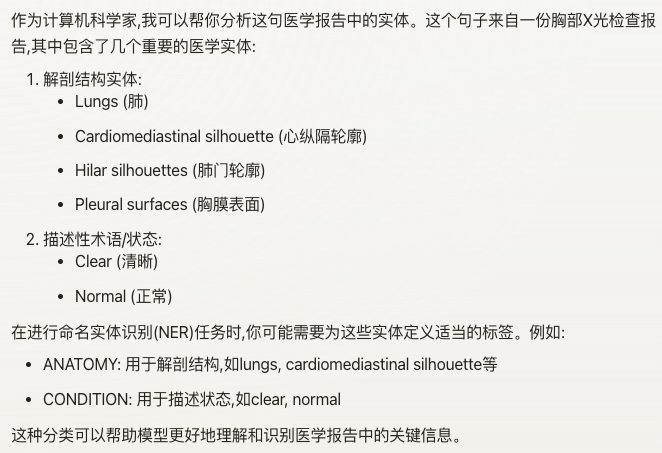

cardiomediastinal
要被分成carido，mediastinal  
Heart (C0018787)  
Mediastinal (C1522718)


这里的500标准数据，其实也不可靠，没有考虑到嵌套和后续的可能的标准花处理，比如分割复合单词。
- 是个很rough的数据。

我们在这里要多做一步。我称之为 简单实体 to 标准化实体。  
- 这一步用生产式AI，就像上面的例子，很好用。  
- 或者用规则，也可以。

为后续的normalization做准备。

鉴于这个结果，我们可以做一些更实际的应用层面上的工作。


In [9]:
unique_second_elements = {token[1] for token in all_tokens}

print(unique_second_elements)

num_unique_second_elements = len(unique_second_elements)
print(num_unique_second_elements)

type_counts = {}
for token in all_tokens:
    token_type = token[1]
    if token_type in type_counts:
        type_counts[token_type] += 1
    else:
        type_counts[token_type] = 1

print(type_counts)

# Filter the tokens to include only ANAT-DP tokens
anat_dp_tokens = [token for token in all_tokens if token[1] == 'ANAT-DP']

# Print the content of ANAT-DP tokens
for token in anat_dp_tokens:
    print(token[0])


{'ANAT-DP', 'OBS-DP', 'OBS-U', 'OBS-DA'}
4
{'OBS-DP': 812, 'ANAT-DP': 398, 'OBS-DA': 153, 'OBS-U': 190}
superior
of T 5 through T 9
structures
knuckle
pectus
internal jugular
lower
diameter
valve
volumes
fifith
heart
barely
vascularity
AP
Cardiac
cutaneous
nodule
CP
sided
gastroesophageal
AZYGOS
CARDIAC
border
Vasculature
first
infectious
skin
near
Median
aorta
L 2 through L 4
BASILAR
axilla
contour
Lower
paratracheal
hilus
locations
margin
left arm
bases
valvular
Interstitial
spine
esophagus
lateral structures
subpulmonic
superior cavoatrial junction
3.4 cm
mid - to - distal
interspace
lingula
duodenum
Bibasilar
basilar
adjacent
Pectus
4 cm above
mediastinum
thoracolumbar junction
biapical
LOBE
cardiac
Pleural
costal
apex
angle
right
aspect
atrium
vertebral
medial
hilar
posteriorly
alveolar
loculated
excavatum
Left sided
vein
5.6 cm
coronary
contents
Multiple
approximately 2.3 cm
biventricular
beneath
mild
Bronchial
spinal
Lateral
bones
peripherally
cardia
other
chest
tricuspid
Sterna

entity: 12388  
unique: 1250

In [10]:
relations = set()

# Step 1: Iterate through each document in train_data
for document_key in train_data:
    # Access the 'entities' for the current document
    entities = train_data[document_key]['entities']
    
    # Step 2: Iterate through each entity in 'entities'
    for entity_key in entities:
        # Access the entity and its relations
        entity = entities[entity_key]
        entity_relations = entity['relations']
        
        # Step 3: Iterate through each relation in 'entity_relations'
        for relation in entity_relations:
            # Extract the related entity key and relation type
            related_entity_key = relation[1]
            relation_type = relation[0]
            
            # Get the related entity
            related_entity = entities[related_entity_key]
            
            # Create a tuple with entity1, entity2, and relation
            relation_tuple = (entity['tokens'], related_entity['tokens'], relation_type)
            
            # Add the relation tuple to the set of relations
            relations.add(relation_tuple)

# At this point, 'relations' contains all the relations between entities in the 'train_data'
print(len(relations))

# print(relations)

3363


3300 relations

## neo4j database setup

In [11]:
from py2neo import Graph, Node, Relationship

# 连接到Neo4j数据库
# graph = Graph("bolt://localhost:7689", auth=("neo4j", "neo4j"))

# 创建节点
# alice = Node("Person", name="Alice", age=25)
# bob = Node("Person", name="Bob", age=30)
# graph.create(alice)
# graph.create(bob)

# # 创建关系
# alice_knows_bob = Relationship(alice, "KNOWS", bob)
# graph.create(alice_knows_bob)